In [386]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import squarify

In [9]:
# read in Field of Research reference table for all divisions (22) and groups (157)
codes = pd.read_csv('publications/FOR-codes.csv')
codes.head()
#codes.shape

,division,division_code,group,group_code
0,01 MATHEMATICAL SCIENCES,1,0101 PURE MATHEMATICS,101
1,01 MATHEMATICAL SCIENCES,1,0102 APPLIED MATHEMATICS,102
2,01 MATHEMATICAL SCIENCES,1,0103 NUMERICAL AND COMPUTATIONAL MATHEMATICS,103
3,01 MATHEMATICAL SCIENCES,1,0104 STATISTICS,104
4,01 MATHEMATICAL SCIENCES,1,0105 MATHEMATICAL PHYSICS,105


In [235]:
# read in all ERI Field of Research Code divisions and groups (146) and write to a csv
# TODO get text from Code field as separate column
df_ERI = pd.read_csv('publications/ERI-publications_processed.csv',index_col=0,header=0)
all_codes_ERI = df_ERI['FOR (ANZSRC) Categories']
split_codes_ERI = all_codes_ERI.str.split(pat=";",expand=True).stack()
values_ERI = split_codes_ERI.value_counts().keys().tolist()
counts_ERI = split_codes_ERI.value_counts().tolist()
research_codes_ERI = pd.DataFrame(list(zip(values_ERI,counts_ERI)),columns=['Code','Count'])
research_codes_ERI['Label']=research_codes_ERI['Code'].str.extract('(\w+)', expand=True)
#research_codes_ERI['ID']=research_codes_ERI['Code'].str.extract('([^.0-9])', expand=True)
#research_codes_ERI['ID']
rc_grouped = research_codes_ERI.groupby(['Label'],as_index=False)['Count'].sum().sort_values(by=['Count'],ascending=False)
sorted_rc = research_codes_ERI.sort_values('Count',ascending=False).drop_duplicates(['Label'])
sorted_rc.head()
#sorted_rc.to_csv('publications/ERI-publications-FOR-codes.csv')
#sorted_rc.shape

,Code,Count,Label
0,06 Biological Sciences,4034,06
1,04 Earth Sciences,2272,04
3,0602 Ecology,1722,0602
4,0403 Geology,1600,0403
5,0502 Environmental Science and Management,1445,0502


In [344]:
# split ERI FOR codes into divisions and groups ('division','group','label','count'), write to csv
new_codes = pd.DataFrame(columns=['division','group','label','count'])
new_codes['label'] = sorted_rc['Label'].astype('int64')

def catdiv(c):
    if (((c['label'] >= 100) & (c['label'] <= 199)) | (c['label'] == 1)):
        return 'Mathematical Sciences'
    elif (((c['label'] >= 200) & (c['label'] <= 299)) | (c['label'] == 2)):
        return 'Physical Sciences'
    elif (((c['label'] >= 300) & (c['label'] <= 399)) | (c['label'] == 3)):
        return 'Chemical Sciences'
    elif (((c['label'] >= 400) & (c['label'] <= 499)) | (c['label'] == 4)):
        return 'Earth Sciences'
    elif (((c['label'] >= 500) & (c['label'] <= 599)) | (c['label'] == 5)):
        return 'Environmental Sciences'
    elif ((c['label'] >= 600) & (c['label'] <= 699)) | (c['label'] == 6):
        return 'Biological Sciences'
    elif (((c['label'] >= 700) & (c['label'] <= 799)) | (c['label'] == 7)):
        return 'Agricultural and Veterinary Sciences'
    elif (((c['label'] >= 800) & (c['label'] <= 899)) | (c['label'] == 8)):
        return 'Information and Computing Sciences'
    elif (((c['label'] >= 900) & (c['label'] <= 999)) | (c['label'] == 9)):
        return 'Engineering'
    elif (((c['label'] >= 1000) & (c['label'] <= 1099)) | (c['label'] == 10)):
        return 'Technology'
    elif (((c['label'] >= 1100) & (c['label'] <= 1199)) | (c['label'] == 11)):
        return 'Medical and Health Sciences'
    elif (((c['label'] >= 1200) & (c['label'] <= 1299)) | (c['label'] == 12)):
        return 'Built Environment and Design'
    elif (((c['label'] >= 1300) & (c['label'] <= 1399)) | (c['label'] == 13)):
        return 'Education'
    elif (((c['label'] >= 1400) & (c['label'] <= 1499)) | (c['label'] == 14)):
        return 'Economics'
    elif (((c['label'] >= 1500) & (c['label'] <= 1599)) | (c['label'] == 15)):
        return 'Commerce, Management, Tourism and Services'
    elif (((c['label'] >= 1600) & (c['label'] <= 1699)) | (c['label'] == 16)):
        return 'Studies in Human Society'
    elif (((c['label'] >= 1700) & (c['label'] <= 1799)) | (c['label'] == 17)):
        return 'Psychology and Cognitive Sciences'
    elif (((c['label'] >= 1800) & (c['label'] <= 1899)) | (c['label'] == 18)):
        return 'Law and Legal Studies'
    elif (((c['label'] >= 1900) & (c['label'] <= 1999)) | (c['label'] == 19)):
        return 'Studies in Creative Arts and Writing'
    elif (((c['label'] >= 2000) & (c['label'] <= 2099)) | (c['label'] == 20)):
        return 'Language, Communication, and Culture'
    elif (((c['label'] >= 2100) & (c['label'] <= 2199)) | (c['label'] == 21)):
        return 'History and Archaeology'
    elif (((c['label'] >= 2200) & (c['label'] <= 2299)) | (c['label'] == 22)):
        return 'Philosophy and Religious Studies'
    else:
        return 'Undefined'

def catgrp(x):
    if ((x['label'] >= 1) & (x['label'] <= 22)):
        return 'Undefined'
    else:
        return sorted_rc['Code']

new_codes['division'] = new_codes.apply(catdiv, axis=1)
new_codes['group'] = sorted_rc['Code']
new_codes['count'] = sorted_rc['Count']
new_codes.sort_values('group')
#new_codes.shape
#new_codes.to_csv('publications/ERI-publications-treemap.csv')
#filtered_codes = new_codes['label']> 22
#filtered_codes = new_codes['count']> 1
#new_codes['count'] = new_codes[filtered_codes]
new_codes.head()
#new_codes_filtered.sort_values('label')

,division,group,label,count
0,Biological Sciences,06 Biological Sciences,6,4034
1,Earth Sciences,04 Earth Sciences,4,2272
3,Biological Sciences,0602 Ecology,602,1722
4,Earth Sciences,0403 Geology,403,1600
5,Environmental Sciences,0502 Environmental Science and Management,502,1445


In [412]:
# New summarized dataframe of ERI's FOR codes by division
eriCodes = new_codes.groupby(['division'],as_index=False)['count'].sum()
eriCodes.sort_values('count',ascending=False)

,division,count
1,Biological Sciences,7533
5,Earth Sciences,7028
8,Engineering,3391
9,Environmental Sciences,3219
11,Information and Computing Sciences,1174
3,Chemical Sciences,830
6,Economics,810
19,Studies in Human Society,760
0,Agricultural and Veterinary Sciences,637
2,Built Environment and Design,428


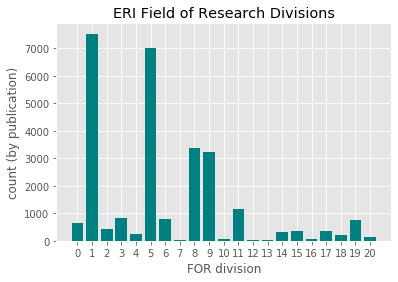

<Figure size 432x288 with 0 Axes>

In [427]:
# bar chart to see FOR divisions for all of ERI
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(eriCodes['division'])]
plt.bar(x_pos, eriCodes['count'], color='teal')
plt.xlabel("FOR division")
plt.ylabel("count (by publication)")
plt.title("ERI Field of Research Divisions")
plt.xticks(x_pos)
plt.savefig('figures/ERI_FOR_divisions_bar.png', dpi=200)
plt.show()
plt.draw()

In [361]:
# scale FOR code counts between the min and max, then assign this scale to our values
norm = matplotlib.colors.Normalize(vmin=min(eriCodes["count"]), vmax=max(eriCodes["count"]))
colors = [matplotlib.cm.jet(norm(value)) for value in eriCodes["count"]]

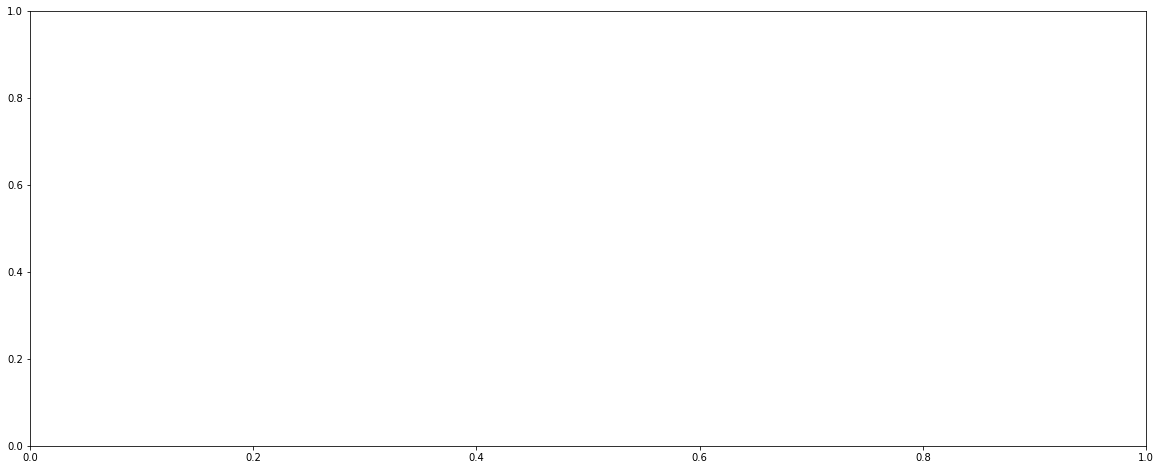

In [364]:
# create plot and resize it
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 8)

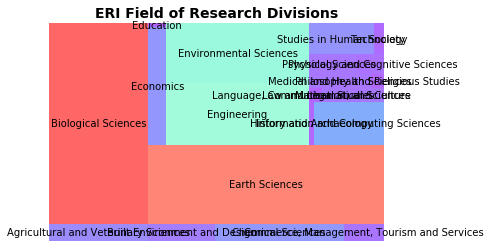

<Figure size 432x288 with 0 Axes>

In [388]:
# treemap with squarify to plot divisions (aggregated), labeled and color coded (alpha layer shows black labels)
squarify.plot(label=eriCodes["division"],sizes=eriCodes["count"], color = colors, alpha=.6)
plt.title("ERI Field of Research Divisions",fontsize=14,fontweight="bold")
plt.axis('off')
plt.savefig('figures/ERI_FOR_divisions_tree.png', dpi=200)
plt.show()
plt.draw()

In [333]:
# read in Kelly Caylor's Field of Research Codes (all) and write to a csv
df = pd.read_csv('publications/ERI-publications-csv/Kelly-Krispin-Caylor.csv',index_col=0,header=1)
all_codes = df['FOR (ANZSRC) Categories']
split_codes = all_codes.str.split(pat=";",expand=True).stack()
values = split_codes.value_counts().keys().tolist()
counts = split_codes.value_counts().tolist()
research_codes = pd.DataFrame(list(zip(values,counts)),columns=['Code','Count'])
research_codes['Label']=research_codes['Code'].str.extract('(\w+)', expand=True)
grouped = research_codes.groupby(['Label'],as_index=False)['Count'].sum().sort_values(by=['Count'],ascending=False)
sorted_kc = research_codes.sort_values('Count',ascending=False).drop_duplicates(['Label'])
sorted_kc
#sorted_kc.to_csv('publications/ERI-publications-Caylor-FOR-codes.csv')
#research_codes.shape

,Code,Count,Label
0,06 Biological Sciences,48,06
1,05 Environmental Sciences,28,05
2,04 Earth Sciences,23,04
3,09 Engineering,21,09
4,0502 Environmental Science and Management,21,0502
5,0602 Ecology,20,0602
6,07 Agricultural and Veterinary Sciences,15,07
7,0406 Physical Geography and Environmental Geo...,14,0406
8,0907 Environmental Engineering,13,0907
10,0607 Plant Biology,13,0607


In [322]:
# split Caylor's FOR codes into divisions and groups ('division','group','label','count')
new_codes_kc = pd.DataFrame(columns=['division','group','label','count'])
new_codes_kc['label'] = sorted_kc['Label'].astype('int64')
new_codes_kc['division'] = new_codes_kc.apply(catdiv, axis=1)
new_codes_kc['group'] = sorted_kc['Code']
new_codes_kc['count'] = sorted_kc['Count']
new_codes_kc.sort_values('count',ascending=False)
#new_codes_filtered_kc.to_csv('publications/ERI-publications-Caylor-treemap.csv')
new_codes_filtered_kc
#filtered_codes_kc = new_codes_kc['count']> 1
#new_codes_filtered_kc = new_codes_kc[filtered_codes_kc]
#new_codes_filtered_kc.sort_values('group')
#new_codes_filtered_kc.shape

,division,group,label,count
0,Biological Sciences,06 Biological Sciences,6,48
1,Environmental Sciences,05 Environmental Sciences,5,28
2,Earth Sciences,04 Earth Sciences,4,23
3,Engineering,09 Engineering,9,21
4,Environmental Sciences,0502 Environmental Science and Management,502,21


In [428]:
# New dataframe of Caylor's FOR codes containing only codes with more than 1 publication count
caylorCodes = new_codes_filtered_kc.groupby(['division'],as_index=False)['count'].sum()
caylorCodes.sort_values('count',ascending=False)

,division,count
1,Biological Sciences,90
6,Environmental Sciences,70
5,Engineering,52
3,Earth Sciences,43
0,Agricultural and Veterinary Sciences,23
7,Information and Computing Sciences,20
4,Economics,12
8,Mathematical Sciences,6
2,Chemical Sciences,2


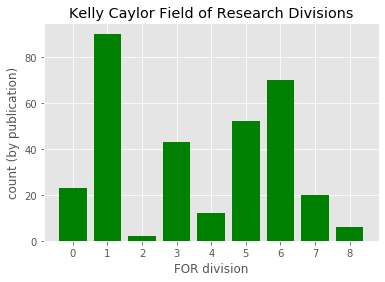

<Figure size 432x288 with 0 Axes>

In [434]:
# bar chart to see Caylor's FOR divisions
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(caylorCodes['division'])]
plt.bar(x_pos, caylorCodes['count'], color='green')
plt.xlabel("FOR division")
plt.ylabel("count (by publication)")
plt.title("Kelly Caylor Field of Research Divisions")
plt.xticks(x_pos)
plt.savefig('figures/KC_FOR_divisions_bar.png', dpi=200)
plt.show()
plt.draw()

In [392]:
# scale FOR code counts between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(caylorCodes["count"]), vmax=max(caylorCodes["count"]))
colors = [matplotlib.cm.gist_rainbow(norm(value)) for value in caylorCodes["count"]]

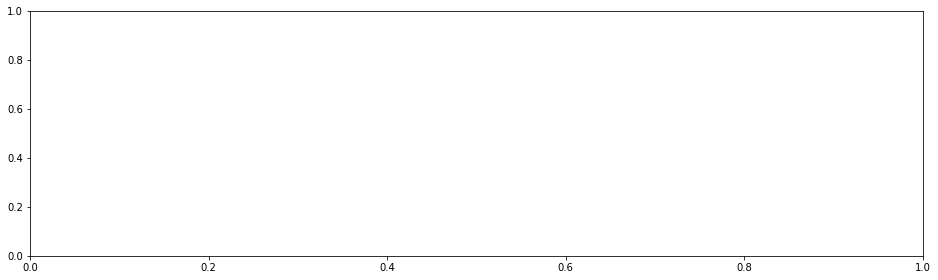

In [328]:
# create plot and resize it
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

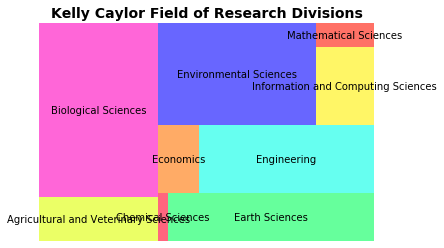

<Figure size 432x288 with 0 Axes>

In [435]:
# treemap squarify to plot divisions (aggregated), labeled and color coded (alpha layer shows black labels)
# ISSUE multi-level treemap implementation not available in squarify (try plotly, R, or D3)
squarify.plot(label=caylorCodes["division"],sizes=caylorCodes["count"], color = colors, alpha=.6)
plt.title("Kelly Caylor Field of Research Divisions",fontsize=14,fontweight="bold")
plt.axis('off')
plt.savefig('figures/KC_FOR_divisions_tree.png', dpi=200)
plt.show()
plt.draw()

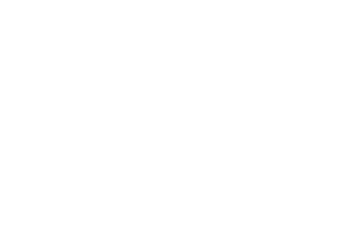